In [1]:
from pathlib import Path
from PIL import Image, ImageDraw
import numpy as np
import pprint
import os
from shutil import copyfile
from tqdm.notebook import tqdm
import pandas as pd
import h5py

In [6]:
data_dir = Path('./data/Density Research Lab 18 samples')
image_dir = Path('./data/imgs')
coordinate_dir = Path('./data/xy')
os.makedirs(image_dir, exist_ok = True)
os.makedirs(coordinate_dir, exist_ok = True)

proximity_map_path = Path('./data/pmap.h5')
grayscale_proximity_map_path = Path('./data/grayscale_pmap.h5')

patch_img_dir = Path('./data/patch_img')
os.makedirs(patch_img_dir, exist_ok = True)

pmap_patch_img_dir = Path('./data/pmap_patch_img')
os.makedirs(pmap_patch_img_dir, exist_ok = True)
patch_img_pmap = Path('./data/patch_img_pmap.h5')

training_file = Path('./data/train_data.h5')

In [7]:
folder_name = os.listdir(data_dir)
# folder_name = [ x.replace(' ', '_') for x in folder_name]
print(folder_name)

['D1 R1 day 9', 'D1 R2 day 9', 'D1 R3 day 9', 'D1 R4 day 9', 'D1 R5 day 9', 'D1 R6 day 9', 'D2 R1 day 9', 'D2 R2 day 9', 'D2 R3 day 9', 'D2 R4 day 9', 'D2 R5 day 9', 'D2 R6 day 9', 'D3 R1 day 9', 'D3 R2 day 9', 'D3 R3 day 9', 'D3 R4 day 9', 'D3 R5 day 9', 'D3 R6 day 9']


In [8]:
for name in folder_name:
    temp_dir = data_dir / name
    file_list = os.listdir(temp_dir)
    if 'new' in file_list:
        temp_dir = temp_dir / 'new'
        file_list = os.listdir(temp_dir)
    
    for img_name in file_list:
        if '.tif' in img_name:
            file_name = '{}_{}'.format(name.replace(' ', '_'), img_name)
            copyfile(temp_dir / img_name, image_dir / file_name)

In [9]:
img_list = os.listdir(image_dir)
img_list.sort()
xy_list = os.listdir(coordinate_dir)
xy_list.sort()

In [10]:
def generate_diffusion(max_size):
    g_range = 2
    X,Y=np.meshgrid(np.linspace(-g_range,g_range,max_size),np.linspace(-g_range,g_range,max_size));
    mu,sigma=0,1;
    G=np.exp(-((X-mu)**2+(Y-mu)**2)/2.0*sigma**2)
    
#     plt.contourf(X, Y, G, 100, cmap='Blues')
#     plt.colorbar()
#     plt.show()
    return G / np.sum(G)

def generate_difusion_map(xy_coord, size, max_distance):
    additional_width = int(size * 0.2)
    max_size = size + 2*additional_width
    img_arr = np.full((max_size, max_size), 0.0)
    diff_arr = generate_diffusion(max_distance)
    diff_distance = int(np.floor(diff_arr.shape[0]/2.))
    valid_coord = []
    for i in xy_coord:
        if i[0] > size or i[1] > size:
            continue

        y = int(i[0] + additional_width)
        x = int(i[1] + additional_width)
        img_arr[x - diff_distance: x + diff_distance + 1, y - diff_distance: y + diff_distance + 1] += diff_arr
        valid_coord.append([i[0], i[1]])
        
    return img_arr[additional_width: additional_width + size, additional_width: additional_width + size], np.array(valid_coord)
    
# print(generate_diffusion(3, 0.8))

# test_arr = np.full((7, 7), 1.0)
# center = np.array([[1,1]])
# diff_arr = generate_difusion_map(center, 5, 2, 0.8)
# pprint.pprint(diff_arr)
# print(diff_arr.shape)
    

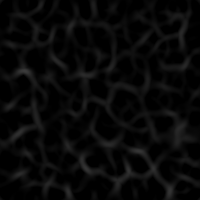

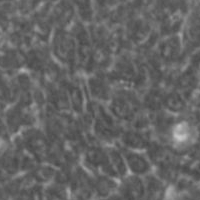

In [11]:
# from skimage.util import img_as_float, img_as_ubyte
# from skimage.color import rgb2gray
# from skimage.filters import meijering, sato, frangi, hessian
# from skimage.filters import unsharp_mask
# from skimage.morphology import disk
# from skimage.filters import threshold_otsu, rank

# def image_sharpening(img_arr):
#     image = rgb2gray(img_as_ubyte(img_arr))
#     radius = 20
#     amount = 2
#     sharpen_img = unsharp_mask(image, radius=radius, amount=amount)
#     return img_as_ubyte(sharpen_img)
    
# def rgb_to_grey(img_arr):
#     image = rgb2gray(img_as_ubyte(img_arr))
#     return img_as_ubyte(image)

# def otsu_thresholding(img_arr):
#     image = image_sharpening(img_arr)
#     radius = 12
#     selem = disk(radius)
#     local_otsu = rank.otsu(image, selem)
    
#     otsu_img = image >= local_otsu
    
#     return img_as_ubyte(otsu_img)

# def sato_ridge(img_arr):
#     image = image_sharpening(img_arr)
#     sato_img = sato(image,sigmas=[4], black_ridges=False)
#     return img_as_ubyte(sato_img)
    
# for img_file in img_list:
#     name = img_file.split('.')[0]
#     img = Image.open(image_dir / img_file)
    
#     original = rgb_to_grey(img)
#     original = Image.fromarray(original)
    
# #     processing_img = image_sharpening(img)
# #     processing_img = Image.fromarray(processing_img)
    
# #     processing_img = otsu_thresholding(img)
# #     processing_img = Image.fromarray(processing_img)

#     processing_img = sato_ridge(img)
#     processing_img = Image.fromarray(processing_img)
    
#     display(processing_img)
#     display(original)
#     break
    

In [12]:
# with h5py.File(grayscale_proximity_map_path, 'w') as file:
#     for i in tqdm(range(len(img_list))):
#         img = Image.open(image_dir / img_list[i])
#         df = pd.read_csv(coordinate_dir / xy_list[i], index_col=0)
#         coords = df[['X', 'Y']].values
#         print(img_list[i], xy_list[i], img.size[0])
        
#         img_arr = np.array(img)
        
#         sharpen_img = image_sharpening(img)
#         sharpen_img = np.expand_dims(sharpen_img, axis=-1)
        
#         otsu_img = otsu_thresholding(img)
#         otsu_img = np.expand_dims(otsu_img, axis=-1)
        
#         sato_img = sato_ridge(img)
#         sato_img = np.expand_dims(sato_img, axis=-1)
        
#         final_img = np.concatenate((sharpen_img, otsu_img, sato_img), axis=2)
#     #     size = 5
#     #     draw = ImageDraw.Draw(img)
#     #     for coord in coords:
#     #         bbox = (coord - size).tolist() + (coord + size).tolist()
#     #         draw.ellipse(bbox, outline=(255, 0, 0), width=2)
#     #     img.show()
#         img_arr, coords = generate_difusion_map(coords, img.size[0], 25)
        
#         file.create_dataset('img/{:03d}'.format(i), data=final_img)
#         file.create_dataset('pmap/{:03d}'.format(i), data=img_arr)
#         file.create_dataset('xy/{:03d}'.format(i), data=coords)

D1_R1_day_9_Image1.tif D1_R1_day_9_Image1.csv 200
D1_R1_day_9_Image2.tif D1_R1_day_9_Image2.csv 200
D1_R1_day_9_Image3.tif D1_R1_day_9_Image3.csv 200
D1_R1_day_9_Image4.tif D1_R1_day_9_Image4.csv 200
D1_R1_day_9_Image5.tif D1_R1_day_9_Image5.csv 200
D1_R1_day_9_Image6.tif D1_R1_day_9_Image6.csv 200
D1_R1_day_9_Image7.tif D1_R1_day_9_Image7.csv 200
D1_R1_day_9_Image8.tif D1_R1_day_9_Image8.csv 200
D1_R2_day_9_Image1.tif D1_R2_day_9_Image1.csv 200
D1_R2_day_9_Image2.tif D1_R2_day_9_Image2.csv 200
D1_R2_day_9_Image3.tif D1_R2_day_9_Image3.csv 200
D1_R2_day_9_Image4.tif D1_R2_day_9_Image4.csv 200
D1_R2_day_9_Image5.tif D1_R2_day_9_Image5.csv 200
D1_R2_day_9_Image6.tif D1_R2_day_9_Image6.csv 200
D1_R2_day_9_Image7.tif D1_R2_day_9_Image7.csv 200
D1_R2_day_9_Image8.tif D1_R2_day_9_Image8.csv 200
D1_R3_day_9_Image10.tif D1_R3_day_9_Image10.csv 200
D1_R3_day_9_Image11.tif D1_R3_day_9_Image11.csv 202
D1_R3_day_9_Image12.tif D1_R3_day_9_Image12.csv 200
D1_R3_day_9_Image13.tif D1_R3_day_9_Image13.

In [14]:
with h5py.File(proximity_map_path, 'w') as file:
    for i in tqdm(range(len(img_list))):
        img = Image.open(image_dir / img_list[i])
        df = pd.read_csv(coordinate_dir / xy_list[i], index_col=0)
        coords = df[['X', 'Y']].values
        print(img_list[i], xy_list[i], img.size[0])
              
        img_arr, coords = generate_difusion_map(coords, img.size[0], 25)
        
        file.create_dataset('img/{:03d}'.format(i), data=np.array(img))
        file.create_dataset('pmap/{:03d}'.format(i), data=img_arr)
        file.create_dataset('xy/{:03d}'.format(i), data=coords)

D1_R1_day_9_Image1.tif D1_R1_day_9_Image1.csv 200
D1_R1_day_9_Image2.tif D1_R1_day_9_Image2.csv 200
D1_R1_day_9_Image3.tif D1_R1_day_9_Image3.csv 200
D1_R1_day_9_Image4.tif D1_R1_day_9_Image4.csv 200
D1_R1_day_9_Image5.tif D1_R1_day_9_Image5.csv 200
D1_R1_day_9_Image6.tif D1_R1_day_9_Image6.csv 200
D1_R1_day_9_Image7.tif D1_R1_day_9_Image7.csv 200
D1_R1_day_9_Image8.tif D1_R1_day_9_Image8.csv 200
D1_R2_day_9_Image1.tif D1_R2_day_9_Image1.csv 200
D1_R2_day_9_Image2.tif D1_R2_day_9_Image2.csv 200
D1_R2_day_9_Image3.tif D1_R2_day_9_Image3.csv 200
D1_R2_day_9_Image4.tif D1_R2_day_9_Image4.csv 200
D1_R2_day_9_Image5.tif D1_R2_day_9_Image5.csv 200
D1_R2_day_9_Image6.tif D1_R2_day_9_Image6.csv 200
D1_R2_day_9_Image7.tif D1_R2_day_9_Image7.csv 200
D1_R2_day_9_Image8.tif D1_R2_day_9_Image8.csv 200
D1_R3_day_9_Image10.tif D1_R3_day_9_Image10.csv 200
D1_R3_day_9_Image11.tif D1_R3_day_9_Image11.csv 202
D1_R3_day_9_Image12.tif D1_R3_day_9_Image12.csv 200
D1_R3_day_9_Image13.tif D1_R3_day_9_Image13.

0.006116888671156095 255.0 (200, 200) (200, 200)


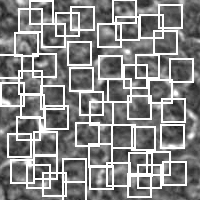

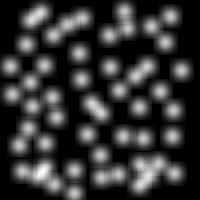

[[174 173]
 [139 185]
 [140 164]
 [149 176]
 [158 163]
 [118 174]
 [101 177]
 [ 74 170]
 [ 74 193]
 [ 54 184]
 [ 45 167]
 [ 38 176]
 [ 22 171]
 [ 19 145]
 [ 28 128]
 [ 45 143]
 [ 87 134]
 [100 155]
 [123 136]
 [143 138]
 [172 136]
 [173 110]
 [139 107]
 [160  91]
 [119  90]
 [101 113]
 [ 91 103]
 [ 56 117]
 [ 32 106]
 [ 12  94]
 [ 30  82]
 [ 10  66]
 [ 26  44]
 [ 44  65]
 [ 81  79]
 [ 79  53]
 [110  67]
 [135  76]
 [147  66]
 [181  70]
 [165  42]
 [151  26]
 [170  16]
 [127  28]
 [124  11]
 [109  35]
 [ 82  18]
 [ 67  24]
 [ 53  35]
 [ 41  12]
 [ 30  20]
 [ 52  97]]


In [13]:
sample_num = 2
with h5py.File(grayscale_proximity_map_path, 'r') as file:
    img = Image.fromarray(file.get('img/{:03d}'.format(sample_num))[:][:, :, 0])
    pmap = file.get('pmap/{:03d}'.format(sample_num))[:]
    coords = file.get('xy/{:03d}'.format(sample_num))[:]
    
    
    pmap_rescale = pmap * (255./np.max(pmap))
    pmap_img = Image.fromarray(pmap_rescale.astype('uint8'), 'L')
    
    print(np.max(pmap), np.max(pmap_rescale), pmap_img.size, img.size)
    
    draw = ImageDraw.Draw(img)
    size = 12
    for coord in coords:
        draw.rectangle([coord[0] - size,
                        coord[1] - size,
                        coord[0] + size,
                        coord[1] + size], outline=(255), width=2)

    display(img)
    display(pmap_img)
    pmap_img.save("./test.png")
    print(coords)
